## Product Color Classification

This project makes use of [FastAI](https://fast.ai) library to train a product color classifier on the [Digikala](https://digikala.com) product dataset released as part of their [data science](https://quera.ir/contest/assignments/20120/problems) competition.

In [2]:
#hide
from fastai.vision.all import *
from PIL import Image

import os
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
train_path = Path("train")
test_path = Path("test")

In [4]:
fns = get_image_files(train_path)
failed = verify_images(fns)
failed.map(train_path.unlink)

(#0) []

In [5]:
dls = ImageDataLoaders.from_path_func(train_path, get_image_files(train_path), 
                                      label_func=parent_label, seed=42, valid_pct=0.2,
                                      item_tfms=Resize(460), 
                                      batch_tfms=[*aug_transforms(size=224, min_scale=0.75),Normalize.from_stats(*imagenet_stats)]
                                      )

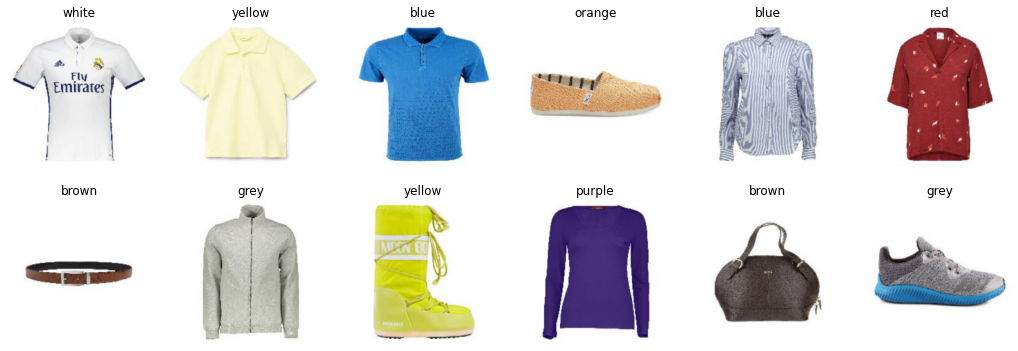

In [6]:
dls.valid.show_batch(max_n=12, nrows=2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


suggested lrs are (0.006918309628963471, 0.007585775572806597)


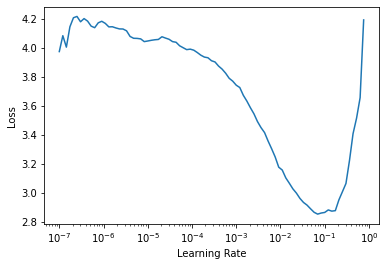

In [7]:
wd=0.1

learn = cnn_learner(dls, resnet18, wd = wd, metrics=accuracy)
lr_min, lr_steep = learn.lr_find()
print(f"suggested lrs are ({lr_min}, {lr_steep})")

In [8]:
learn.fine_tune(4, base_lr=0.006)

epoch,train_loss,valid_loss,accuracy,time
0,1.715643,1.161211,0.682438,00:35


epoch,train_loss,valid_loss,accuracy,time
0,1.005229,0.935037,0.732959,00:37
1,0.827883,0.880199,0.748196,00:37
2,0.624924,0.764888,0.782678,00:37
3,0.421179,0.709064,0.781877,00:38


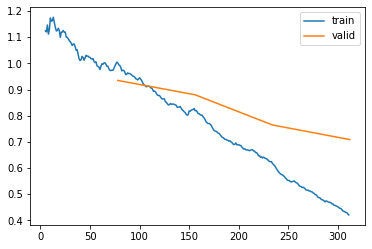

In [9]:
learn.recorder.plot_loss()

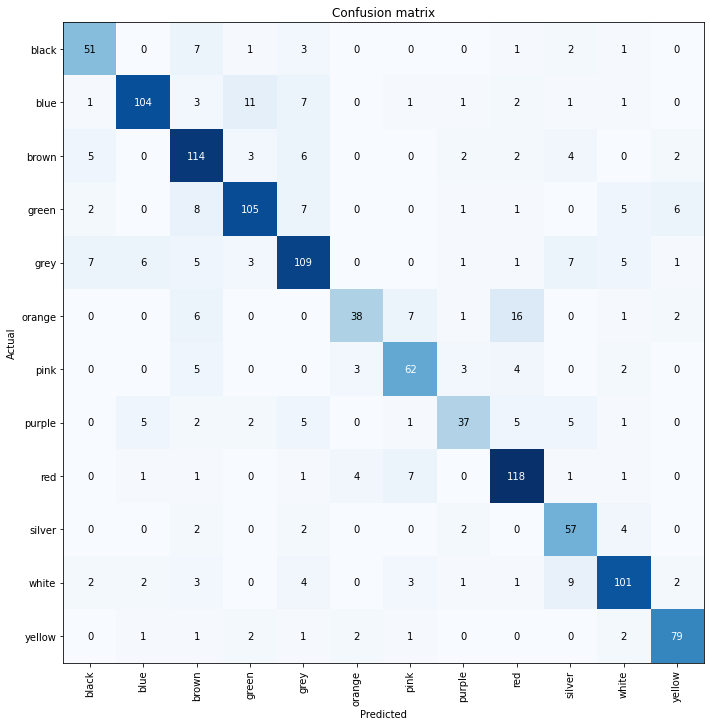

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10))

In [11]:
interp.most_confused(5)

[('orange', 'red', 16),
 ('blue', 'green', 11),
 ('white', 'silver', 9),
 ('green', 'brown', 8),
 ('black', 'brown', 7),
 ('blue', 'grey', 7),
 ('green', 'grey', 7),
 ('grey', 'black', 7),
 ('grey', 'silver', 7),
 ('orange', 'pink', 7),
 ('red', 'pink', 7),
 ('brown', 'grey', 6),
 ('green', 'yellow', 6),
 ('grey', 'blue', 6),
 ('orange', 'brown', 6),
 ('brown', 'black', 5),
 ('green', 'white', 5),
 ('grey', 'brown', 5),
 ('grey', 'white', 5),
 ('pink', 'brown', 5),
 ('purple', 'blue', 5),
 ('purple', 'grey', 5),
 ('purple', 'red', 5),
 ('purple', 'silver', 5)]

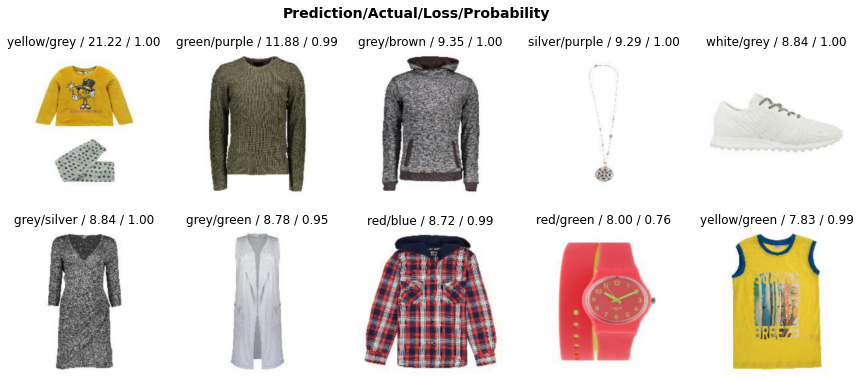

In [12]:
interp.plot_top_losses(10, nrows=2)

In [14]:
path = Path().absolute()
learn.export(path/'export.pkl')